In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import os
from sklearn.metrics import confusion_matrix

In [2]:
#Gene expression data
data = pd.read_csv("../../data/gene_expression_clinical.csv",index_col=0)

In [3]:
#Remove non-relavant columns
data.drop(data.columns[[60483,60484,60485,60486,60488,60489,60490,60491,60492,60493,60494,60495]],axis=1,inplace=True)
data.head()

,ENSG00000000003.13,ENSG00000000005.5,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,ENSG00000001167.13,...,ENSGR0000264510.4,ENSGR0000264819.4,ENSGR0000265658.4,ENSGR0000270726.4,ENSGR0000275287.3,ENSGR0000276543.3,ENSGR0000277120.3,ENSGR0000280767.1,ENSGR0000281849.1,sample_type
X15a44c9d.7c84.4170.96a1.358dd796aa65.htseq.counts,4219,4,1070,565,133,1493,54514,2894,6042,867,...,0,0,0,0,0,0,0,0,0,0
X160aee04.df36.4e94.90c5.b01b2991ba48.htseq.counts,3428,5,821,502,537,278,103347,2307,4815,486,...,0,0,0,0,0,0,0,0,0,0
X1d86dc66.1a62.4cbc.9973.ae63ab754d6a.htseq.counts,5284,7,1403,704,119,629,98287,3840,7077,673,...,0,0,0,0,0,0,0,0,0,0
X2b8bf629.3c22.4dcb.a9a5.ec01c5099167.htseq.counts,3236,0,697,643,56,200,39678,1685,5872,477,...,0,0,0,0,0,0,0,0,0,0
X2cc2e3ce.68cd.4690.9fff.5ecf86c2f57a.htseq.counts,3051,11,984,353,70,387,36361,2870,4070,586,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Principle component analysis
from sklearn.decomposition import PCA

In [325]:
y = np.zeros((data.shape[0],2))
y[:,0] = data['sample_type'].values
y[:,1] = [1 if x==0 else 0 for x in y[:,0]]
Y = y
#Zero in the first field is benign, and zero in the second field is malignant
Y

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       ..., 
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

In [6]:
pca = PCA(n_components=15) #Make a PCA object with n = 15 PCs
pca.fit(data.drop(['sample_type'],axis=1))

PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:
pc = pca.transform(data.drop(['sample_type'],axis=1))
pc.shape

(1114, 15)

In [8]:
#Shuffle the data set
X,Y = shuffle(pc,Y,random_state=1)

In [9]:
#Convert the dataset into train and test set
train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.30, random_state=415)

In [291]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)

(779, 15)
(779, 2)
(335, 15)


In [427]:
allowed_optimizers = ['gd']
#Add leaky relu
allowed_activations = ['sigmoid', 'tanh', 'softmax', 'relu', 'linear']
allowed_losses = ['rmse', 'cross_entropy']

class ModularNeuralNet:
    """
    Modular deep artificial neural network implemented in a sklearn style
    """
    
    #Class assertions
    def assertions(self):
        global allowed_optimizers, allowed_activations, allowed_losses
        assert self.loss in allowed_losses, 'Invalid loss function given'
        assert self.optimizer in allowed_optimizers, 'Invalid optimizer given'
        assert len(self.activations) == self.hidden_layers, 'Number of activation functions must equal the number of hidden layers'
        assert all(x in allowed_activations for x in self.activations), 'Invalid activation function used'
        assert self.epochs > 0, 'Number of epochs must be greater than 0'
        assert self.input_dim > 0, 'Number of input nodes must be greater than 0'
    
    def __init__(self, input_dim = 15,n_class=2,hidden_nodes=[16,16,16,16],lr=0.1,epochs=10,
                activations=['relu','relu','relu','sigmoid'],loss='cross_entropy',plots=False,
                optimizer='gd',batch_size=100, save_step=1,graph=False,save_model=False,
                print_iters=True, print_final=False):
        
        self.n_class = n_class
        self.hidden_nodes = hidden_nodes
        self.hidden_layers = len(self.hidden_nodes)
        self.input_dim = input_dim       
        self.lr = lr
        self.epochs = epochs
        self.activations = activations
        self.loss = loss
        self.optimizer = optimizer
        self.batch_size = batch_size
        self.save_step = save_step
        self.print_iters = print_iters
        self.print_final = print_final
        self.graph = graph
        self.save_model = save_model
        self.plots = plots
        self.assertions()

        self.model_path = os.path.join(os.getcwd(),"model\\")
        self.graph_path = os.path.join(os.getcwd(),"graph\\")
        self.cost_history = []
        self.mse_history = []
        self.accuracy_history = []
        self.weights_dim = [self.input_dim] + self.hidden_nodes
        self.weights = []
        self.biases = []
        
    #Fit takes training input data and trains a neural network with user specified infrastructure
    def fit(self, train_x, train_y):
        '''
        :param x: m x p dataframe
        :return: trained weights and bias for the sdae       
        '''
        
        tf.reset_default_graph()
        
        #Generate tensorflow variables for the weights and biases
        weights = self.weight()
        biases = self.bias()
        
        x = tf.placeholder(dtype=tf.float32,shape=[None, self.input_dim])
        W = tf.Variable(tf.zeros([self.input_dim, self.n_class]))
        b = tf.Variable(tf.zeros([self.n_class]))
        y_ = tf.placeholder(dtype=tf.float32,shape=[None,self.n_class])
        y = tf.placeholder(dtype=tf.float32,shape=[None,self.n_class])
        
        #Initialize variables
        init = tf.global_variables_initializer()
        
        #Initialize saver class
        saver = tf.train.Saver()
        
        #Call the defined model
        y = self.mlp(x,weights,biases)

        #Define the cost function and optimizer
        cost_function = self.cost(self.loss, y, y_)
        training_step = self.optimizers(self.lr,cost_function)
        
        #Define equations for correct prediction and accuracy
        correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
        
        #Initialize tensorflow session
        sess = tf.Session()
        sess.run(init)
        
        for epoch in range(self.epochs):
            sess.run(training_step, feed_dict={x:train_x, y_:train_y})
            
            #Store subset of training cost and accuracy
            if (epoch + 1) % self.save_step == 0:
                
                #Current training cost
                cost = sess.run(cost_function, feed_dict={x:train_x,y_:train_y})
                self.cost_history.append(cost)

                #Current test set MSE, move to transform method
                #pred_y = sess.run(y,feed_dict={x:test_x})
                #mse = tf.reduce_mean(tf.square(pred_y - test_y))
                #mse_ = sess.run(mse)
                #self.mse_history.append(mse_)

                #Current training accuracy
                accuracy_ = (sess.run(accuracy, feed_dict={x:train_x,y_:train_y}))
                self.accuracy_history.append(accuracy_)
                
                #Print iterations based on class specification
                if self.print_iters:
                    print('epoch : ', epoch, ' - ', 'cost: ', cost, ' - ', 'accuracy: ', accuracy_)
            
        #Save weights and biases
        self.weights = sess.run(weights)
        self.biases = sess.run(biases)
            
        #Save tensorflow graph based on class specification 
        if self.graph:
            File_Writer = tf.summary.FileWriter(self.graph_path, sess.graph)
            print('Tensorboard graph saved to: ', self.graph_path)
        
        if self.save_model:
            save_path = saver.save(sess,self.model_path)
            print("Model saved in file: %s" % save_path)
            
        #Plot cost and training accuracy on class specification
        if self.plots:
            self.train_plots()
            
        if self.print_final:
            #print the final cost
            print('Final Cost: ', sess.run(cost_function, feed_dict={x:train_x, y_:train_y}))

            #Print the final training accuracy
            print("Final Training Accuracy: ", (sess.run(accuracy, feed_dict={x:train_x, y_:train_y})))
        
        return
        
    #Implements the desired cost function
    def cost(self,loss, y, y_):
        if loss == 'rmse':
            return tf.sqrt(tf.reduce_mean(tf.square(tf.subtract(y_, y))))
        elif loss == 'cross_entropy':
            #Removed tf.reduce_mean
            return tf.losses.softmax_cross_entropy(logits=y,onehot_labels=y_)
    
    #Implements the desired cost function
    def optimizers(self, lr, loss):
        if self.optimizer == 'gd':
            return tf.train.GradientDescentOptimizer(lr).minimize(loss)
        
        elif self.optimizer == 'adam':
            return tf.train.AdamOptimizer(lr).minimize(loss)
    
    #Implements the desired activation function
    def activate(self, linear, name):
        if name == 'sigmoid':
            return tf.nn.sigmoid(linear, name='layer')
        elif name == 'softmax':
            return tf.nn.softmax(linear, name='layer')
        elif name == 'linear':
            return linear
        elif name == 'tanh':
            return tf.nn.tanh(linear, name='layer')
        elif name == 'relu':
            return tf.nn.relu(linear, name='layer')
        
    def weight(self):
        weights = {'out':tf.Variable(tf.truncated_normal([self.weights_dim[-1],self.n_class]),
                                     dtype=tf.float32)}
        for i in range(self.hidden_layers):
            var = 'h'+str(i)
            weights[var] = tf.Variable(tf.truncated_normal([self.weights_dim[i],self.weights_dim[i+1]]),
                                      dtype=tf.float32)
        return weights
    
    def bias(self):
        biases = {'out':tf.Variable(tf.truncated_normal([self.n_class]),
                                   dtype=tf.float32)}
        for i in range(self.hidden_layers):
            var = var = 'b'+str(i)
            biases[var] = tf.Variable(tf.truncated_normal([self.hidden_nodes[i]]),
                                     dtype=tf.float32)
        return biases
    
    #Define the multiple layer perceptron model
    def mlp(self, x, weights, biases):

        layer = x
        #Hidden Layers
        for i in range(self.hidden_layers):
            layer = tf.add(tf.matmul(layer,weights['h'+str(i)]),biases['b'+str(i)])
            layer = self.activate(layer,self.activations[i])
            
        #Output Layer
        out_layer = tf.add(tf.matmul(layer, weights['out']), biases['out'])
        
        return out_layer
    
    def train_plots(self):
        #Plot the cost 
        plt.plot(self.cost_history,'r')
        plt.title('Training Cost History')
        plt.show()
        
        #Plot the training accuracy
        plt.plot(self.accuracy_history,'b')
        plt.title('Training Accuracy')
        plt.show()
        
    def test_plots(self):
        return ""

In [458]:
#Initiate class
model = ModularNeuralNet(hidden_nodes=[10,10,10,10,10,10],activations=['tanh','relu','relu','relu','relu','sigmoid'],
                         lr=0.1,graph=False,save_model=False,plots=True,epochs=1000,print_iters=True,
                         save_step=1,print_final=True)

epoch :  0  -  cost:  0.82983  -  accuracy:  0.81258
epoch :  1  -  cost:  0.780729  -  accuracy:  0.81258
epoch :  2  -  cost:  0.734549  -  accuracy:  0.81258
epoch :  3  -  cost:  0.691272  -  accuracy:  0.81258
epoch :  4  -  cost:  0.651436  -  accuracy:  0.81258
epoch :  5  -  cost:  0.615447  -  accuracy:  0.81258
epoch :  6  -  cost:  0.583697  -  accuracy:  0.81258
epoch :  7  -  cost:  0.556461  -  accuracy:  0.81258
epoch :  8  -  cost:  0.533802  -  accuracy:  0.81258
epoch :  9  -  cost:  0.515546  -  accuracy:  0.81258
epoch :  10  -  cost:  0.501235  -  accuracy:  0.81258
epoch :  11  -  cost:  0.490354  -  accuracy:  0.81258
epoch :  12  -  cost:  0.482257  -  accuracy:  0.81258
epoch :  13  -  cost:  0.476304  -  accuracy:  0.81258
epoch :  14  -  cost:  0.471976  -  accuracy:  0.81258
epoch :  15  -  cost:  0.46876  -  accuracy:  0.81258
epoch :  16  -  cost:  0.466373  -  accuracy:  0.81258
epoch :  17  -  cost:  0.464385  -  accuracy:  0.81258
epoch :  18  -  cost: 

epoch :  165  -  cost:  0.415529  -  accuracy:  0.813864
epoch :  166  -  cost:  0.411749  -  accuracy:  0.813864
epoch :  167  -  cost:  0.414281  -  accuracy:  0.813864
epoch :  168  -  cost:  0.41125  -  accuracy:  0.813864
epoch :  169  -  cost:  0.412889  -  accuracy:  0.813864
epoch :  170  -  cost:  0.41113  -  accuracy:  0.813864
epoch :  171  -  cost:  0.413081  -  accuracy:  0.813864
epoch :  172  -  cost:  0.411266  -  accuracy:  0.813864
epoch :  173  -  cost:  0.414212  -  accuracy:  0.813864
epoch :  174  -  cost:  0.412354  -  accuracy:  0.813864
epoch :  175  -  cost:  0.418907  -  accuracy:  0.813864
epoch :  176  -  cost:  0.416639  -  accuracy:  0.813864
epoch :  177  -  cost:  0.429182  -  accuracy:  0.813864
epoch :  178  -  cost:  0.410672  -  accuracy:  0.813864
epoch :  179  -  cost:  0.410707  -  accuracy:  0.813864
epoch :  180  -  cost:  0.410629  -  accuracy:  0.813864
epoch :  181  -  cost:  0.41191  -  accuracy:  0.813864
epoch :  182  -  cost:  0.410111  

epoch :  314  -  cost:  0.398645  -  accuracy:  0.815148
epoch :  315  -  cost:  0.399459  -  accuracy:  0.815148
epoch :  316  -  cost:  0.403804  -  accuracy:  0.815148
epoch :  317  -  cost:  0.407179  -  accuracy:  0.815148
epoch :  318  -  cost:  0.411172  -  accuracy:  0.815148
epoch :  319  -  cost:  0.405373  -  accuracy:  0.815148
epoch :  320  -  cost:  0.401648  -  accuracy:  0.815148
epoch :  321  -  cost:  0.397205  -  accuracy:  0.815148
epoch :  322  -  cost:  0.396756  -  accuracy:  0.815148
epoch :  323  -  cost:  0.396366  -  accuracy:  0.815148
epoch :  324  -  cost:  0.396042  -  accuracy:  0.815148
epoch :  325  -  cost:  0.395813  -  accuracy:  0.815148
epoch :  326  -  cost:  0.395819  -  accuracy:  0.815148
epoch :  327  -  cost:  0.396607  -  accuracy:  0.815148
epoch :  328  -  cost:  0.39664  -  accuracy:  0.815148
epoch :  329  -  cost:  0.397752  -  accuracy:  0.815148
epoch :  330  -  cost:  0.394017  -  accuracy:  0.815148
epoch :  331  -  cost:  0.392884

epoch :  459  -  cost:  0.358141  -  accuracy:  0.815148
epoch :  460  -  cost:  0.357372  -  accuracy:  0.815148
epoch :  461  -  cost:  0.357846  -  accuracy:  0.815148
epoch :  462  -  cost:  0.357073  -  accuracy:  0.815148
epoch :  463  -  cost:  0.357573  -  accuracy:  0.815148
epoch :  464  -  cost:  0.356792  -  accuracy:  0.815148
epoch :  465  -  cost:  0.357319  -  accuracy:  0.815148
epoch :  466  -  cost:  0.356507  -  accuracy:  0.815148
epoch :  467  -  cost:  0.357012  -  accuracy:  0.815148
epoch :  468  -  cost:  0.35623  -  accuracy:  0.815148
epoch :  469  -  cost:  0.356731  -  accuracy:  0.815148
epoch :  470  -  cost:  0.355967  -  accuracy:  0.815148
epoch :  471  -  cost:  0.35649  -  accuracy:  0.815148
epoch :  472  -  cost:  0.355715  -  accuracy:  0.815148
epoch :  473  -  cost:  0.35626  -  accuracy:  0.815148
epoch :  474  -  cost:  0.355456  -  accuracy:  0.815148
epoch :  475  -  cost:  0.355982  -  accuracy:  0.815148
epoch :  476  -  cost:  0.355166  

epoch :  624  -  cost:  0.342538  -  accuracy:  0.827985
epoch :  625  -  cost:  0.343424  -  accuracy:  0.834403
epoch :  626  -  cost:  0.342489  -  accuracy:  0.829268
epoch :  627  -  cost:  0.343244  -  accuracy:  0.834403
epoch :  628  -  cost:  0.342414  -  accuracy:  0.829268
epoch :  629  -  cost:  0.343014  -  accuracy:  0.834403
epoch :  630  -  cost:  0.342359  -  accuracy:  0.829268
epoch :  631  -  cost:  0.342764  -  accuracy:  0.834403
epoch :  632  -  cost:  0.342255  -  accuracy:  0.829268
epoch :  633  -  cost:  0.342472  -  accuracy:  0.834403
epoch :  634  -  cost:  0.342118  -  accuracy:  0.829268
epoch :  635  -  cost:  0.341949  -  accuracy:  0.834403
epoch :  636  -  cost:  0.341692  -  accuracy:  0.829268
epoch :  637  -  cost:  0.340831  -  accuracy:  0.833119
epoch :  638  -  cost:  0.340306  -  accuracy:  0.829268
epoch :  639  -  cost:  0.338937  -  accuracy:  0.833119
epoch :  640  -  cost:  0.338584  -  accuracy:  0.834403
epoch :  641  -  cost:  0.33832

epoch :  772  -  cost:  0.337183  -  accuracy:  0.845956
epoch :  773  -  cost:  0.334178  -  accuracy:  0.839538
epoch :  774  -  cost:  0.341588  -  accuracy:  0.843389
epoch :  775  -  cost:  0.34503  -  accuracy:  0.83697
epoch :  776  -  cost:  0.336863  -  accuracy:  0.844673
epoch :  777  -  cost:  0.330907  -  accuracy:  0.838254
epoch :  778  -  cost:  0.3306  -  accuracy:  0.843389
epoch :  779  -  cost:  0.329735  -  accuracy:  0.838254
epoch :  780  -  cost:  0.329541  -  accuracy:  0.843389
epoch :  781  -  cost:  0.329324  -  accuracy:  0.839538
epoch :  782  -  cost:  0.329475  -  accuracy:  0.84724
epoch :  783  -  cost:  0.32935  -  accuracy:  0.838254
epoch :  784  -  cost:  0.330352  -  accuracy:  0.84724
epoch :  785  -  cost:  0.329768  -  accuracy:  0.838254
epoch :  786  -  cost:  0.332392  -  accuracy:  0.849807
epoch :  787  -  cost:  0.330467  -  accuracy:  0.839538
epoch :  788  -  cost:  0.334908  -  accuracy:  0.851091
epoch :  789  -  cost:  0.332113  -  a

epoch :  932  -  cost:  0.341135  -  accuracy:  0.831836
epoch :  933  -  cost:  0.344702  -  accuracy:  0.842105
epoch :  934  -  cost:  0.32204  -  accuracy:  0.856226
epoch :  935  -  cost:  0.320664  -  accuracy:  0.852375
epoch :  936  -  cost:  0.320193  -  accuracy:  0.854942
epoch :  937  -  cost:  0.319866  -  accuracy:  0.854942
epoch :  938  -  cost:  0.319595  -  accuracy:  0.854942
epoch :  939  -  cost:  0.31936  -  accuracy:  0.854942
epoch :  940  -  cost:  0.319139  -  accuracy:  0.854942
epoch :  941  -  cost:  0.318928  -  accuracy:  0.853659
epoch :  942  -  cost:  0.318723  -  accuracy:  0.853659
epoch :  943  -  cost:  0.318523  -  accuracy:  0.856226
epoch :  944  -  cost:  0.318329  -  accuracy:  0.856226
epoch :  945  -  cost:  0.318123  -  accuracy:  0.856226
epoch :  946  -  cost:  0.317937  -  accuracy:  0.856226
epoch :  947  -  cost:  0.317738  -  accuracy:  0.858793
epoch :  948  -  cost:  0.317541  -  accuracy:  0.858793
epoch :  949  -  cost:  0.317354 

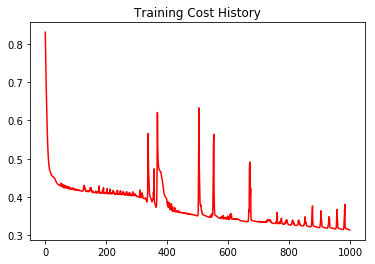

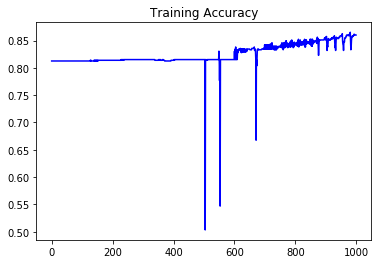

Final Cost:  0.314351
Final Training Accuracy:  0.860077


In [459]:
#Fit to training data
model.fit(train_x, train_y)

In [460]:
#Transform with tes

In [461]:
print(model.weights)
print(model.weights['h0'].shape)


{'out': array([[ 0.5730654 ,  0.32157338],
       [-0.43950033,  0.42405906],
       [-1.94493139,  0.27198723],
       [-0.15864035, -0.28348428],
       [-0.45784324,  0.66705263],
       [ 0.06909241, -1.36648631],
       [ 0.66349733, -0.57904702],
       [-1.30503964, -0.58889145],
       [ 0.53671801,  1.75444293],
       [ 2.1038022 , -1.38928878]], dtype=float32), 'h0': array([[  1.95901692e+00,  -4.17536378e-01,   6.12919626e-04,
          7.84098506e-02,  -6.76712036e-01,   1.90762058e-01,
         -4.15916353e-01,   1.38326837e-02,  -5.76901078e-01,
         -3.60961258e-01],
       [ -3.15391004e-01,   7.59925485e-01,  -3.98923121e-02,
          6.45950675e-01,  -8.28748643e-01,   2.07044616e-01,
          1.61616194e+00,   6.03398740e-01,   5.22435367e-01,
         -9.09360230e-01],
       [  1.62678707e+00,   5.12139406e-03,  -1.23273933e+00,
          9.56462622e-01,  -7.57004380e-01,   8.88903856e-01,
         -3.16228002e-01,  -1.43873465e+00,   1.31199941e-01,
       